## Visualization of CIC-IDS-2017 Dataset

Space transformation and conversion into two dimensional space has been performed here to get a better idea of data distribution

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pickle as pkl
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids 
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Project_Data\NIDS\CSV-Files-CICIDS-2017\Preprocessed-Data\CICIDS.csv')

In [3]:
df.drop(columns=['Flow ID', 'Source IP', 'Source Port', 'Destination IP','Destination Port', 'Timestamp'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827677 entries, 0 to 2827676
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Protocol                     float64
 1   Flow Duration                float64
 2   Total Fwd Packets            float64
 3   Total Backward Packets       float64
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  

In [6]:
df.Label.value_counts()

BENIGN                        2271122
DoS Hulk                       230123
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [19]:
X_0, X, Y_0, Y = train_test_split(df.iloc[:,:-2],df['Label'],stratify=df['Label'], test_size=0.9, random_state=225)

In [20]:
Y.value_counts()

BENIGN                        2044010
DoS Hulk                       207111
PortScan                       142924
DDoS                           115223
DoS GoldenEye                    9264
FTP-Patator                      7142
SSH-Patator                      5307
DoS slowloris                    5216
DoS Slowhttptest                 4949
Bot                              1760
Web Attack – Brute Force         1356
Web Attack – XSS                  587
Infiltration                       32
Web Attack – Sql Injection         19
Heartbleed                         10
Name: Label, dtype: int64

### 2D Visualization of data (When 5% of data is transformed)

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


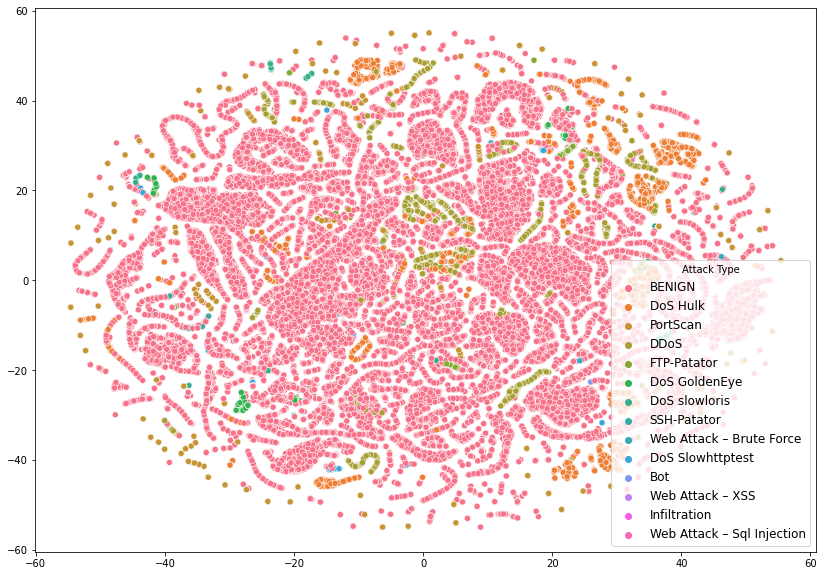

In [8]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res = tsne.fit_transform(X)
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue=Y)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Attack Type')

In [9]:
df_attack=df[df.Label!='BENIGN']

In [17]:
X_0, X, Y_0, Y = train_test_split(df_attack.iloc[:,:-2],df_attack['Label'],stratify=df_attack['Label'], test_size=0.9, random_state=225)

In [18]:
Y.value_counts()

DoS Hulk                      207111
PortScan                      142924
DDoS                          115223
DoS GoldenEye                   9264
FTP-Patator                     7142
SSH-Patator                     5307
DoS slowloris                   5216
DoS Slowhttptest                4949
Bot                             1760
Web Attack – Brute Force        1356
Web Attack – XSS                 587
Infiltration                      32
Web Attack – Sql Injection        19
Heartbleed                        10
Name: Label, dtype: int64

### 2D Visualization of Attack Data instancces Only

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


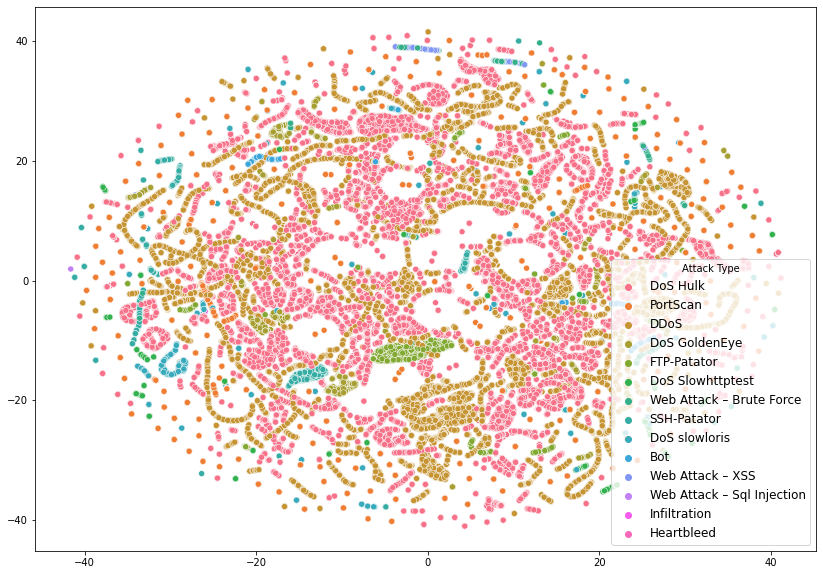

In [14]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res_a = tsne.fit_transform(X)
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res_a[:,0], y=tsne_res_a[:,1], hue=Y)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Attack Type')

In [15]:
from sklearn.preprocessing import StandardScaler as SS
scaler = StandardScaler()
x=scaler.fit_transform(X)

### 2D Visualization of Standardized Attack Data instancces

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


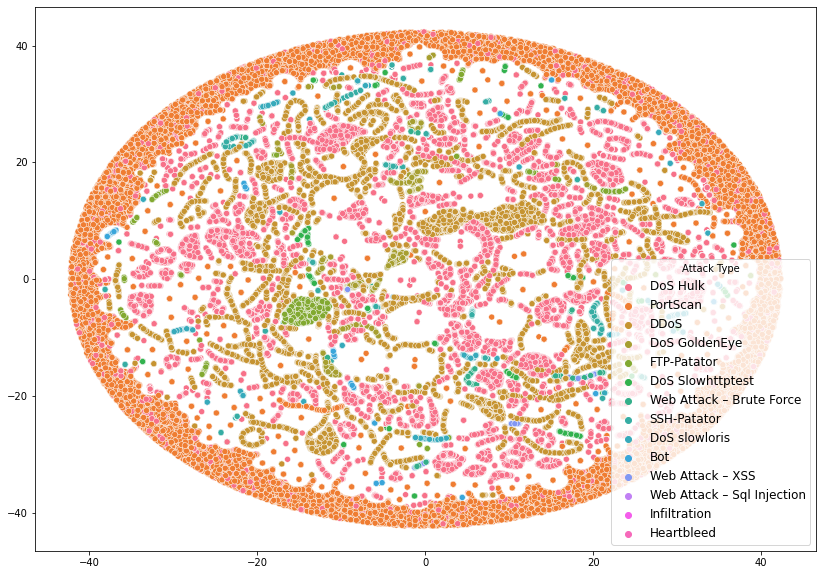

In [16]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res_a = tsne.fit_transform(x)
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res_a[:,0], y=tsne_res_a[:,1], hue=Y)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Attack Type')

In [24]:
dict_u1={'BENIGN':90000,'DoS Hulk': 90000, 'PortScan': 90000, 'DDoS': 90000, 'DoS GoldenEye': 9264, 'FTP-Patator': 7142,
       'SSH-Patator':5307, 'DoS slowloris': 5216, 'DoS Slowhttptest':4949, 'Bot':1760, 'Web Attack – Brute Force': 1356, 'Web Attack – XSS': 587,
        'Infiltration':32,'Web Attack – Sql Injection':19, 'Heartbleed':10 }

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42,sampling_strategy=dict_u1)
x, y = rus.fit_resample(X, Y)

In [26]:
y.value_counts()

BENIGN                        90000
DDoS                          90000
DoS Hulk                      90000
PortScan                      90000
DoS GoldenEye                  9264
FTP-Patator                    7142
SSH-Patator                    5307
DoS slowloris                  5216
DoS Slowhttptest               4949
Bot                            1760
Web Attack – Brute Force       1356
Web Attack – XSS                587
Infiltration                     32
Web Attack – Sql Injection       19
Heartbleed                       10
Name: Label, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler as SS
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [29]:
dict_u={'BENIGN':1000,'DoS Hulk': 1000, 'PortScan': 1000, 'DDoS': 1000, 'DoS GoldenEye': 1000, 'FTP-Patator': 1000,
       'SSH-Patator':1000, 'DoS slowloris': 1000, 'DoS Slowhttptest':1000, 'Bot':1000, 'Web Attack – Brute Force': 1000, 'Web Attack – XSS': 587,
        'Infiltration':32,'Web Attack – Sql Injection':19, 'Heartbleed':10 }

In [30]:
cc = ClusterCentroids(random_state=42,sampling_strategy=dict_u)
X_res, y_res = cc.fit_resample(x, y)

### 2D Visualization Standardized Data

Undersampling is perfomed to balanced the overall data for proper visualization. Moreover, Cluster based approach is adopted for undersampling the datapoints

C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yasir.ali\.conda\envs\New_Project\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


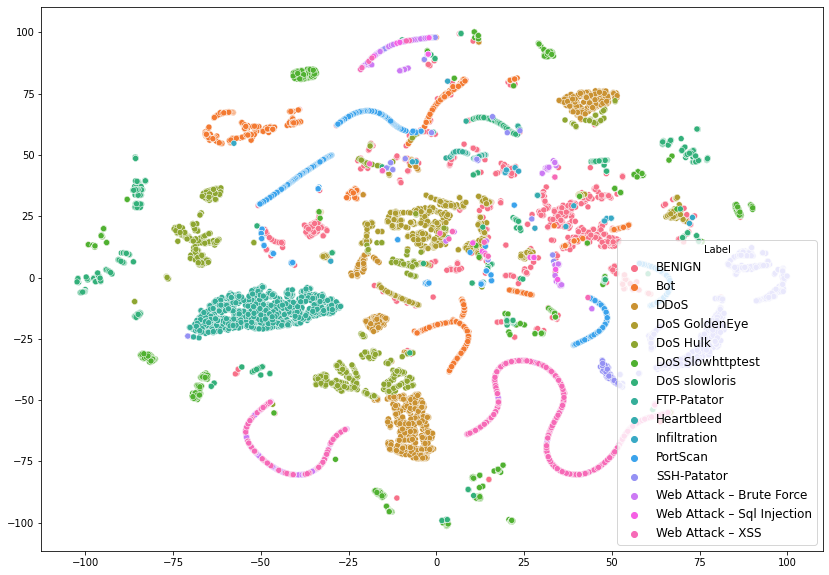

In [31]:
tsne=TSNE(n_components=2, verbose=0)
tsne_res_a = tsne.fit_transform(X_res)
plt.figure(figsize=[14,10])
sns.scatterplot(x=tsne_res_a[:,0], y=tsne_res_a[:,1], hue=y_res)
#plt.axis('off')
plt.legend(loc=4, prop={'size': 12}, title='Label')